# Bag
Jest to format danych przechowujący informacje o wiadomościach, które zostały wybrane do zarejestrowania w trakcie działania jakiegoś procesu np. monitorowanie zmiany położenia w czasie, zbieranie danych z czujników. Zebrane dane mogą być później użyte do testowania różnych algorytmów np. do wyznaczania odometrii na podstawie fuzji danych z sensorów, testowania różnych parametrów algorytmów do mapowania terenu.

Do utworzenia bag'a wykorzystywane jest narzędzie rosbag umożliwiające rejestrowanie wiadomości ROS. Takie podejście umożliwia odtwarzanie i dostarczanie danych do systemu w taki sam sposób w jaki się pojawiają przy użyciu node'ów. 

Dostępne komendy dla polecenia rosbag.

In [1]:
!rosbag --help

Usage: rosbag <subcommand> [options] [args]

A bag is a file format in ROS for storing ROS message data. The rosbag command can record, replay and manipulate bags.

Available subcommands:
   check  	Determine whether a bag is playable in the current system, or if it can be migrated.
   compress  	Compress one or more bag files.
   decompress  	Decompress one or more bag files.
   decrypt  	Decrypt one or more bag files.
   encrypt  	Encrypt one or more bag files.
   filter  	Filter the contents of the bag.
   fix  	Repair the messages in a bag file so that it can be played in the current system.
   help  
   info  	Summarize the contents of one or more bag files.
   play  	Play back the contents of one or more bag files in a time-synchronized fashion.
   record  	Record a bag file with the contents of specified topics.
   reindex  	Reindexes one or more bag files.

For additional information, see http://wiki.ros.org/rosbag



Szczegółowe informacje o dostępnych możliwościach polecenia można znaleźć na stronie.
http://wiki.ros.org/rosbag/Commandline

Rejestrowane mogą być nie tylko wszystkie dane jednocześnie tak ja się pojawiają w systemie, ale mamy możliwość wybrania sposobu jak mają być zarejestrowane. Można zarejestrować m.in.:
- pojedyncze wiadomości (oddzielne nazwy topicow)
- wiadomości spełniające okreslone kryteria (-e (regex), -x (exclude_regex) z podanym kryterium filtracji)
- rosbaga o określonym czasie trwania (--duration)
- rosbaga o określonym rozmiarze (--size)
- podział baga na mniejszy plik gdy czas trwania lub rozmiar zostanie przekroczony (--split)
- rozbaga o określonym prefixie w nazwie (-o) oraz o podanej nazwie (-O)
- maksymalna liczba zarejestrowanych danych, starsze pliki będą kasowane (--max-splits)
- topici z określonego node'a (--node)

### Rejestrowanie danych
Najczęściej będzie wykorzystane polecenie wpisywane w terminalu:

#### Zadanie 1
Zarejestrować rosbaga dla topiców od położenia robotów. Przerwać nagrywanie po wykonaniu pełnego okrążenia przez najwolniejszego robota. Wywołać polecenie terminala w jupyter notebook, czyli z (!). 
Zarejestrowany rosbag będzie wykorzystany w dalszych ćwiczeniach i nie powinien być usuwany.

In [ ]:
!

In [ ]:
!ls # wyświetlenie wszystkich plików z folderu

#### Zadanie 2
Korzystając z dokumentacji nagrać 20 sekundowego rosbaga o dowolnej podanej nazwie nie generowanej domyślnie jako data i godzina. Również zarejestrować informacje dla położeń. Wywołać polecenie terminala w jupyter notebook, czyli z (!).

In [ ]:
!

In [ ]:
!ls

In [ ]:
!rm nazwa_pliku #usuwa wybrany plik, można usunąć zarejestrowanego baga

#### Zadanie 3
Zarejestrować te same dane. Tym razem rosbag powinien być dzielony na mniejsze 5 sekundowe fragmenty. Należy przechowywać w historii 4 bagi oprócz aktualnie zgrywanego (łącznie powinno być widocznych 5 po przerwaniu działania polecenia). Pozostałe powinny być usuwane. Nazwa powinna zawierać dowolny prefix np. dzielony_bag_ograniczony. Wywołać polecenie terminala w jupyter notebook, czyli z (!). Przerwać rejestrowanie po wyświetleniu co najmniej 6 bagów i zweryfikować działanie polecenia.

In [6]:
!rosbag record /robot3/color_sensor

[ INFO] [1619507004.567714200]: Subscribing to /robot3/color_sensor
[ INFO] [1619507004.596513200]: Recording to '2021-04-27-07-03-24.bag'.
^C


In [7]:
!rosbag play "2021-04-27-07-03-24.bag"

[ INFO] [1619507025.749318900]: Opening 2021-04-27-07-03-24.bag
[FATAL] [1619507025.924641100]: Error opening file: 2021-04-27-07-03-24.bag


In [11]:
#shift + tab
import rosbag
paczka_sensory = rosbag.Bag("2021-04-27-07-03-24.bag.active")

ROSBagUnindexedException: Unindexed bag

In [ ]:
paczka_sensory.get_message_count()

In [ ]:
for wiad in paczka_sesnory.read_messages():
    print(wiad)

- It works:

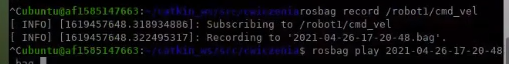

In [ ]:
#rosbag record /robort3/color_sensor

In [ ]:
#rosbag play

In [ ]:
!ls

### Wyświetlanie informacji
W terminalu do wyświetlenia informacji o bagu używamy polecenia:

rosbag info nazwa_baga

In [ ]:
#Wyświetlić informację o jednym z zarejestrowanych bagów. Wywołać polecenie jak w terminalu (!).
!rosbag info ... #wpisać nazwę jakiegos baga

### Odtwarzanie rosbaga
Do odtworzenia zarejestrowanych prędkości sterujących robotów i sprawdzenia ich zachowania najpierw należy zarejestrować dane. 

In [ ]:
# Uzupłnić w miejscu ... parametrami odpowiadającymi za ustawienie nazwy 
# (np. velocities) i czas trwania baga (np. 10s)
!rosbag record ... /robot1/cmd_vel /robot2/cmd_vel /robot3/cmd_vel

Należy wylączyć skrypt (6_1_Archiwizacja_i_analiza_danych-symulacja.ipynb) odpowiedzialny za ruch robotów. Zrestartować symulację:

In [ ]:
!rosservice call /reset
!rosservice call /kill turtle1
!rosservice call /spawn 5.5 4 0 robot1
!rosservice call /spawn 5.5 2.5 0 robot2
!rosservice call /spawn 5.5 1 0 robot3

W terminalu do odgrywania informacji o bagu używamy polecenia:

rosbag play nazwa_rosbaga

In [ ]:
#Wyświetlić informację o jednym z zarejestrowanych bagów. Wywołać polecenie jak w terminalu (!).
!rosbag play ... # Wpisać nazwę zarejestrowanego baga z prędkościami

### Odczyt i analiza danych
Link do wiki zawierającego więcej szczegółowych informacji i przykładów.
http://wiki.ros.org/rosbag/CookbookCookbook

#### Odczytanie listy topiców wraz z typem

In [ ]:
import rosbag
bag_name = ... # Podać nazwę zarejestrowanego baga z Zadania 1
bag = rosbag.Bag(bag_name) 
print("Surowe dane o topicach i ich typach \n")
print(bag.get_type_and_topic_info())
print("------------")

print("Zarejestrowane: \n")
for data in bag.get_type_and_topic_info()[1].keys():
    print(data)
print("------------")

print("topic wraz z typem \n")
print("nazwa          typ")
for data in bag.get_type_and_topic_info()[1].keys():
    print(data + "   " + bag.get_type_and_topic_info()[1][data][0])

print("------------")
print("Typ wiadomosci\n")

!rosmsg info turtlesim/Pose

#### Ograniczenie liczby wiadomości w bagu

In [ ]:
import rosbag

num_msgs = 100 # ograniczenie do 100 wiadomości

with rosbag.Bag('output.bag', 'w') as outbag:
    bag_name = ... # Podać nazwę zarejestrowanego baga z Zadania 1 
    for topic, msg, t in rosbag.Bag(bag_name).read_messages():
        while num_msgs:
            outbag.write(topic, msg, t)
            num_msgs -= 1

bag = rosbag.Bag('output.bag')
print("Surowe dane o topicach i ich typach \n")
print(bag.get_type_and_topic_info()) # w message_count (liczba wiadomości) 
                                     # powinna pojawić się wartość 100

Po przepisaniu i ograniczeniu wiadomości powinien pojawić się nowy bag o nazwie "output.bag"

In [ ]:
!ls 

### Export danych do CSV

In [ ]:
import csv # biblioteka do obsługi plików CSV
import rosbag
import rospy

bag_name = ... # Podać nazwę zarejestrowanego baga z Zadania 1

def create_pose_csv_file(bag_name, file_name, pose_topic_name):
    # Utworzenie pliku o podanej nazwie file_name i zapisywanie danych do pliku
    bag = rosbag.Bag(bag_name)
    with open(file_name, mode='w') as data_file:
        data_writer = csv.writer(data_file, delimiter=',')
        # Ustawienie nagłówka
        data_writer.writerow(['pose x', 'pose y']) 

        # W każdej iteracji pętli odczytywana jest kolejna wiadomość, która pojawiła
        # się na topicu /robot1/pose
        for topic, msg, t in bag.read_messages(topics=[pose_topic_name]):
            # Zapis położenia x,y robota do pliku
            data_writer.writerow([msg.x, msg.y])
    bag.close()

# Utworzenie plikow z danymi dla robota 1 i 2
create_pose_csv_file(bag_name, 'pose_data_robot_1.csv', '/robot1/pose')
create_pose_csv_file(bag_name, 'pose_data_robot_2.csv', '/robot2/pose')

### Odczyt danych z pliku CSV i generowanie wykresu

In [ ]:
import csv 

def get_robot_pose(file_name):
    # Zmienne x,y przechowujące informacje o położeniu robota.
    x = []
    y = []
    # Otworzenie zapisanego pliku
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        # Pętla do iteracji po kolejnych wierszach pliku
        for row in csv_reader:
            if line_count == 0:
                #print("{}    {}".format(row[0], row[1]))
                line_count += 1
            else:
                #print(" {:.2f}      {:.2f} ".format(float(row[0]),float(row[1])))
                line_count += 1
                # Dopisanie na końcu listy kolejnego odczytanego położenia x, y
                x.append(float(row[0]))
                y.append(float(row[1]))
    return x, y

# Odebranie informacji oddzielnie o położeniu x,y z powyższej funkcji zwracającej oddzielnie
# listę dla współrzędnych x i y.
pose_r1 = get_robot_pose('pose_data_robot_1.csv')
x = pose_r1[0]
y = pose_r1[1]

In [ ]:
import matplotlib.pyplot as plt
# Odczyt danych o położeniu dla robota 1 i2 
pose_r1 = get_robot_pose('pose_data_robot_1.csv')
pose_r2 = get_robot_pose('pose_data_robot_2.csv')
# dane do wyświetlenia
path1, = plt.plot(pose_r1[0],pose_r1[1], label="robot1")
path2, = plt.plot(pose_r2[0],pose_r2[1], label="robot2")
# ustawienie legendy
plt.legend(handles=[path1,path2])
# ustawienie nazw osi
plt.xlabel("x pose")
plt.ylabel("y pose")
#ustawienie tutułu wykresu
plt.title("Polozenia robotow")
# wyświetlenie wykresu
plt.show()

#### Zadanie 4
Wygenerować wykres dla baga z prędkościami dla 3 robotów. Kolejne kroki do wykonania:
1. Zarejestrowanie rosbaga z prędkościami (w ćwiczeniach pojawił się, ale jeśli został usunięty to nagrać jeszcze raz)
2. Analogicznie do funkcji **create_pose_csv_file(bag_name, file_name, pose_topic_name)** odpowiadającej za tworzenie plików z informacją o położeniach robotów napisać funkcję do tworzenia plików zawierających informacje o prędkościach sterujących robotów.
- zmienić nazwę nagłowka przy zapisie do pliku, w jednej kolumnie są zapisywane prędkości postępowe (liniowa x), a w drugiej obrotowe (kątowa z)
- sprawdzić typ wiadomości dla prędkości i jej strukturę
- na podstawie tej informacji zmienić przy zapisie odczyt odtrzymanych informacji w zmiennej **msg**
3. Analogicznie do funkcji **get_robot_pose(file_name)** odpowiadającej za odczyt danych z plików o położeniu napisać funkcję do odczytu informacji o prędkościach postępowych i obrotowych. Zmienić nazwy i komentarze tak, aby nazwy odnosiły się do prędkości.
4. Narysować wykresy oddzielnie dla prędkości postępowej i obrotowej
- zmienić nazwy osi, tytuł wykresu
- na osi x znajduje się index kolejnej wiadomości
- na osi y pojawia się wartość prędkości
- Użycie metody plot z jednym argumentem spowoduje wyświetlenie odczytanych wartości na osi Y, a na osi X będą kolejne wartości odpowiadające indeksowi odczytanej wartości. 

**plt.plot(data_value, label="robot1")**